In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
acoustic_df = pd.read_csv('../../data/track_features/tf_mini.csv')
session_df =  pd.read_csv('../../data/session-df-ak.csv')

In [30]:
acoustic_df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [31]:
session_df.head()

,Unnamed: 0,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,...,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skip,int_shuffle,int_premium,custom_skip,pause_before_play,custom_pause_before_play
0,0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,True,editorial_playlist,trackdone,trackdone,0,1,1,0,0,0
1,1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,...,True,editorial_playlist,trackdone,trackdone,0,1,1,0,0,0
2,2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,...,True,editorial_playlist,trackdone,trackdone,0,1,1,0,0,0
3,3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,...,True,editorial_playlist,trackdone,trackdone,0,1,1,0,0,0
4,4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,...,True,editorial_playlist,trackdone,trackdone,0,1,1,0,0,0


In [32]:
merge_df = acoustic_df.merge(session_df, how='inner', left_on='track_id', right_on='track_id_clean')

In [33]:
merge_df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skip,int_shuffle,int_premium,custom_skip,pause_before_play,custom_pause_before_play
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,True,user_collection,trackdone,trackdone,0,1,1,0,0,0
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,True,radio,trackdone,trackdone,0,0,1,0,0,0
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,True,radio,backbtn,fwdbtn,1,0,1,1,0,0
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,True,user_collection,trackdone,trackdone,0,0,1,0,1,1
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,True,catalog,trackdone,endplay,3,0,1,1,1,1


In [34]:
merge_df.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'Unnamed: 0', 'session_id', 'session_position',
       'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3',
       'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_beh

In [35]:
acoustic_df.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [36]:
merge_df['skip'].value_counts()

1    70762
0    59029
3    22027
2    16062
Name: skip, dtype: int64

In [37]:
ac_cols = acoustic_df.columns
ac_features = []

In [38]:
ac_feat = ['duration', 'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness', 'danceability']

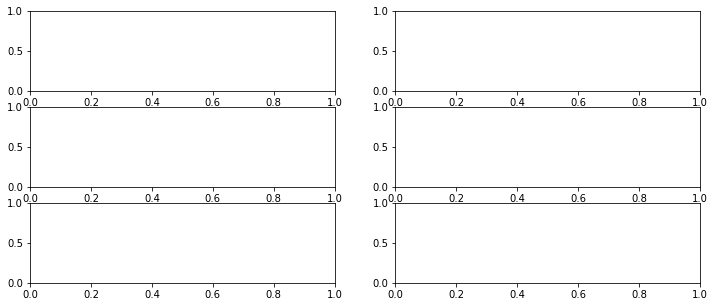

In [39]:
def filter_outliers(count, bins):
    c, b = count[:], bins[:]
    pass

def plot_acoustic_hist(x,y,axs):
    mx, mn = max(acoustic_df[x]), min(acoustic_df[x])
    plt.hist(acoustic_df[x], density=False)
    plt.show()

f, axs = plt.subplots(3,2,figsize=(12,5))


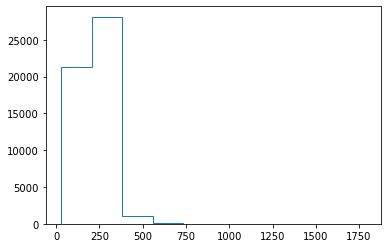

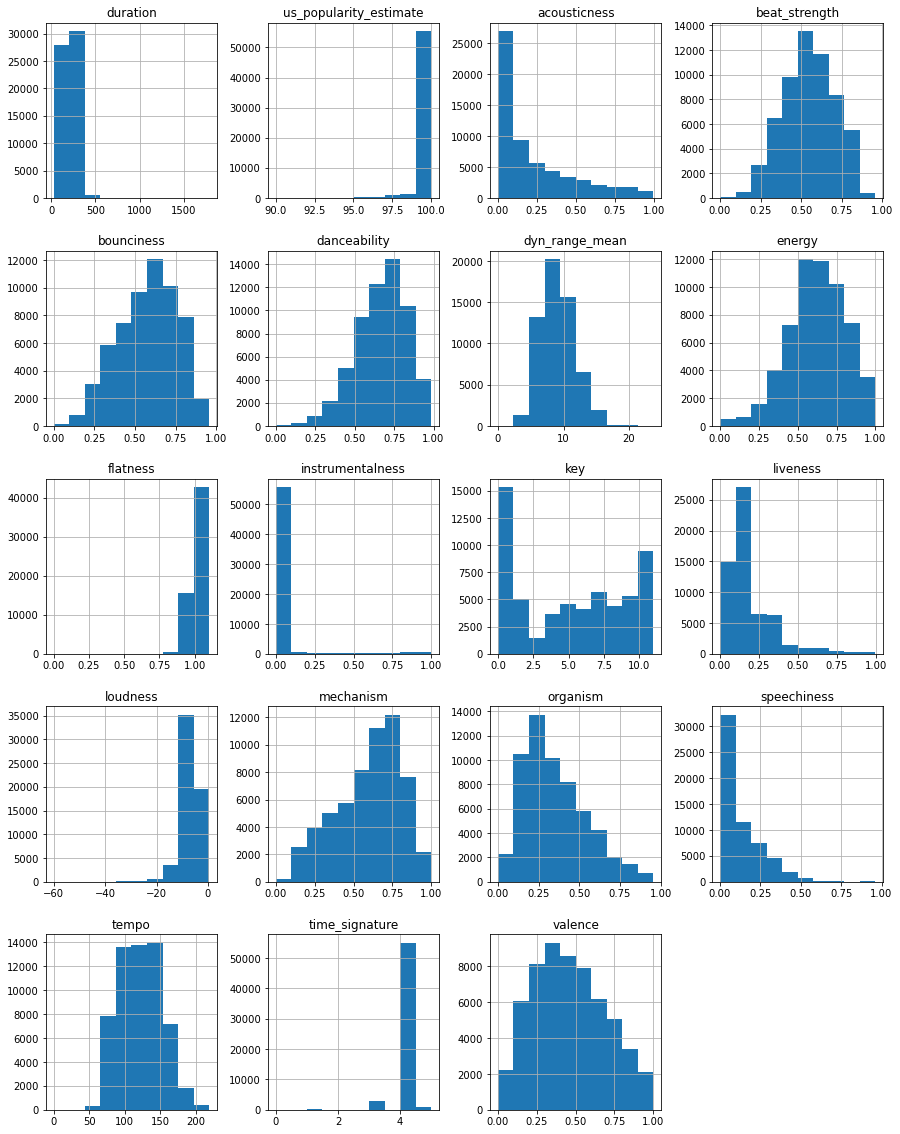

In [42]:
"""
'duration', 'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness', 'danceability',
'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
'acoustic_vector_7'

"""
feat = ['duration', 'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',\
'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',\
'tempo', 'time_signature', 'valence']
merge_df[merge_df['custom_skip'] == 0].hist(column=feat, figsize=(15,20))
plt.savefig('../../img/acoustic_not_skipped-try-1.jpg', bbox_inches='tight', dpi=150)

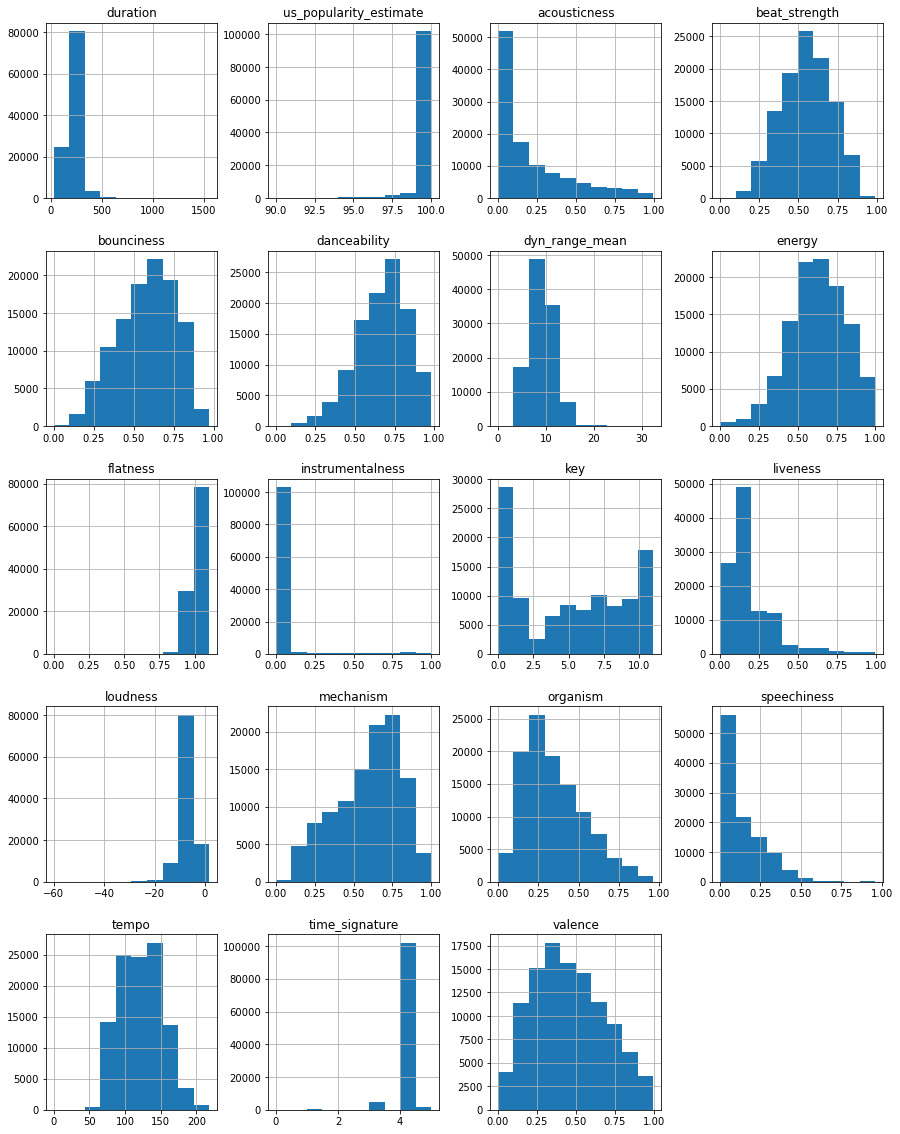

In [43]:
merge_df[merge_df['custom_skip'] > 0].hist(column=feat, figsize=(15,20))
plt.savefig('../../img/acoustic_skip.jpg', bbox_inches='tight', dpi=150)

In [27]:
merge_df.to_csv('../../data/acoustic_and_session.csv')